In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df=pd.read_csv('../MachineLearning/datasets/tested.csv')

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
df.shape

(418, 12)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [50]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [51]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [52]:
df["Age"]=df["Age"].fillna(10)
df["Cabin"]=df["Cabin"].fillna("C105")
df["Fare"]=df["Fare"].fillna(7.8292)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,C105,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,C105,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,C105,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,C105,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,C105,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,10.0,0,0,A.5. 3236,8.0500,C105,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C105,S
416,1308,0,3,"Ware, Mr. Frederick",male,10.0,0,0,359309,8.0500,C105,S


In [53]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder
lbl_encode=LabelEncoder()

df['Name']=lbl_encode.fit_transform(df['Name'])
df['Sex']=lbl_encode.fit_transform(df['Sex'])
df['Ticket']=lbl_encode.fit_transform(df['Ticket'])
df['Cabin']=lbl_encode.fit_transform(df['Cabin'])
df['Embarked']=lbl_encode.fit_transform(df['Embarked'])

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,206,1,34.5,0,0,152,7.8292,22,1
1,893,1,3,403,0,47.0,1,0,221,7.0000,22,2
2,894,0,2,269,1,62.0,0,0,73,9.6875,22,1
3,895,0,3,408,1,27.0,0,0,147,8.6625,22,2
4,896,1,3,178,0,22.0,1,1,138,12.2875,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,353,1,10.0,0,0,267,8.0500,22,2
414,1306,1,1,283,0,39.0,0,0,324,108.9000,22,0
415,1307,0,3,332,1,38.5,0,0,346,7.2500,22,2
416,1308,0,3,384,1,10.0,0,0,220,8.0500,22,2


In [57]:
X=df.drop('Survived',axis=1)
Y=df['Survived']

In [58]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,22,1
1,893,3,403,0,47.0,1,0,221,7.0000,22,2
2,894,2,269,1,62.0,0,0,73,9.6875,22,1
3,895,3,408,1,27.0,0,0,147,8.6625,22,2
4,896,3,178,0,22.0,1,1,138,12.2875,22,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,353,1,10.0,0,0,267,8.0500,22,2
414,1306,1,283,0,39.0,0,0,324,108.9000,22,0
415,1307,3,332,1,38.5,0,0,346,7.2500,22,2
416,1308,3,384,1,10.0,0,0,220,8.0500,22,2


In [59]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

<Axes: >

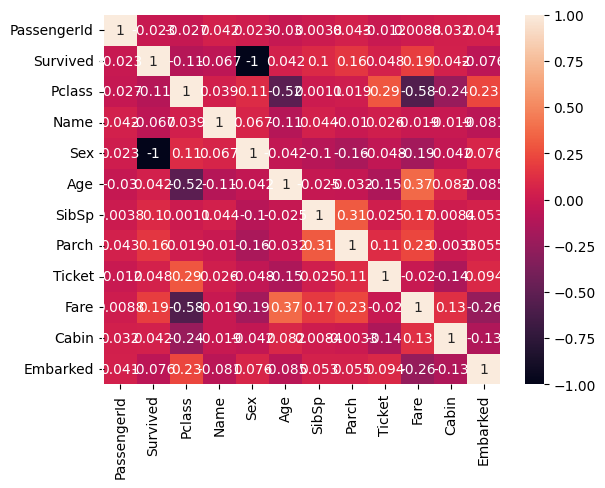

In [60]:
sns.heatmap(df.corr(),annot=True)

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [63]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

y_pred=log_reg.predict(X_test)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(Y_test,y_pred)*100
ac

100.0

In [66]:
svm=SVC(kernel='linear',random_state=3)
svm.fit(X_train,Y_train)
y_pred=svm.predict(X_test)
print(y_pred)

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0]


In [67]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(Y_test,y_pred)*100
ac

100.0

In [68]:
gb=GaussianNB()
gb.fit(X_train,Y_train)
y_pred=gb.predict(X_test)
print(y_pred)

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0]


In [69]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_test,y_pred)*100
ac1

100.0

In [73]:
vc=VotingClassifier(estimators=[('LogisticRegression',log_reg),('SVC',svm),('Naive Baise',gb)])
vc.fit(X_train,Y_train)

y_vc_pred=vc.predict(X_test)
ac_max=accuracy_score(Y_test,y_vc_pred)*100
ac_max  

d:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


100.0

In [89]:

Baggs=BaggingClassifier(n_estimators=9)
Baggs.fit(X_train,Y_train)
y_pred=Baggs.predict(X_test)
print(y_pred)

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0]
